# Exploratory Data Analysis (EDA)
We will explore the dataset to better understand the characteristics of the data and check for the presence of missing values ​​or anomalies. This will help us prepare the data for the prediction model.

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first step is to **take the data** and format it as desired. In this case, I will replace all data points marked as "?" with NaN fields, manually enter the column names, and finally, delete the unwanted columns.

In [375]:
file = "/Users/leona/Desktop/Projeto 1/mammogram-result-prediction/data/raw/mammographic_masses.data"
col_names = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']

df = pd.read_csv(file, na_values=['?'], names=col_names)
df.drop("BI-RADS", axis=1, inplace=True)

In [376]:
df.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       956 non-null    float64
 1   Shape     930 non-null    float64
 2   Margin    913 non-null    float64
 3   Density   885 non-null    float64
 4   Severity  961 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.7 KB


In [378]:
df.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


The next step is to check the amount of **NaN** data present in each column.

In [379]:
df.loc[(df["Age"].isnull())     |
       (df["Shape"].isnull())   |
       (df["Margin"].isnull())  |
       (df["Density"].isnull()) |
       (df["Severity"].isnull())]

,Age,Shape,Margin,Density,Severity
1,43.0,1.0,1.0,NaN,1
4,74.0,1.0,5.0,NaN,1
5,65.0,1.0,NaN,3.0,0
6,70.0,NaN,NaN,3.0,0
7,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...
778,60.0,NaN,4.0,3.0,0
819,35.0,3.0,NaN,2.0,0
824,40.0,NaN,3.0,4.0,1
884,NaN,4.0,4.0,3.0,1


In [380]:
null_count = df.isnull().sum()
null_count

Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [381]:
percent_null = null_count/len(df) * 100
percent_null

Age         0.520291
Shape       3.225806
Margin      4.994797
Density     7.908429
Severity    0.000000
dtype: float64

Now I chose to follow 2 paths, delete the NaN data from the **"Age", "Shape" and "Margin"** columns, in the **"Density"** column I chose to use **Machine learning** to predict the data marked as NaN.

In [382]:
df.dropna(subset=["Age", "Shape", "Margin"], inplace=True)
df.isna().sum()/len(df) * 100

Age         0.000000
Shape       0.000000
Margin      0.000000
Density     6.313416
Severity    0.000000
dtype: float64

To perform the classification model on the NaN data, I chose **RandomForestClassifier**, which is a powerful classification model. I left the settings as default

In [383]:
from sklearn.ensemble import RandomForestClassifier

In [384]:
x_train = df[df["Density"].notnull()]
x_train.drop("Density", axis=1, inplace=True)
y_train = df[df["Density"].notnull()]["Density"]
x_test = df[df["Density"].isnull()]
x_test.drop("Density", axis=1, inplace=True)
y_test = df[df["Density"].isnull()]["Density"]

C:\Users\leona\AppData\Local\Temp\ipykernel_29328\2974167971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop("Density", axis=1, inplace=True)
C:\Users\leona\AppData\Local\Temp\ipykernel_29328\2974167971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop("Density", axis=1, inplace=True)


In [385]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

In [386]:
df.Density[df["Density"].isnull()] = y_predict

C:\Users\leona\AppData\Local\Temp\ipykernel_29328\1446798620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Density[df["Density"].isnull()] = y_predict


In [387]:
df.isna().sum()/len(df) * 100

Age         0.0
Shape       0.0
Margin      0.0
Density     0.0
Severity    0.0
dtype: float64

Now I will do some analysis to see if there is anything else that can be done

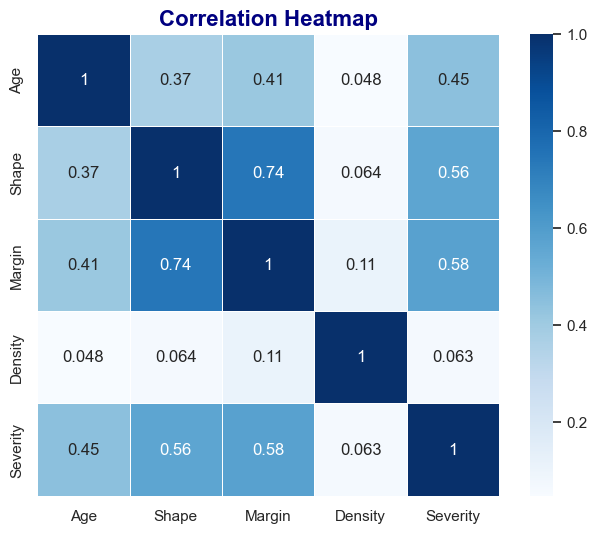

In [388]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues", cbar=True, square=True, linewidths=0.7, linecolor='white')

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold', color='navy')

plt.show()

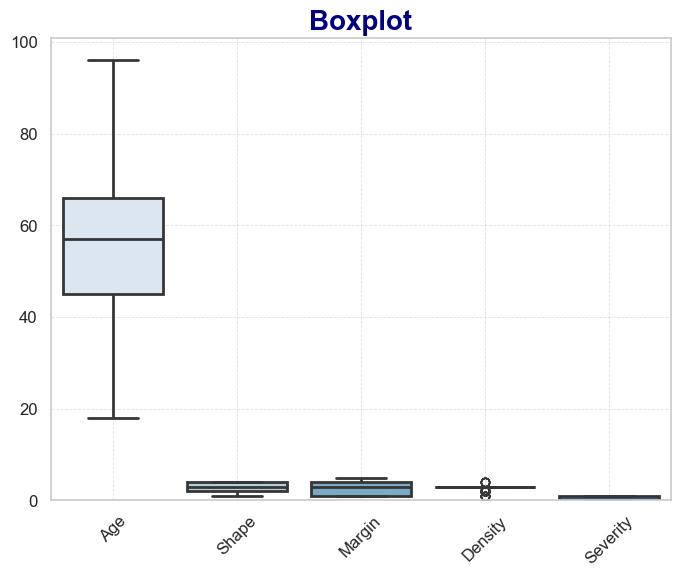

In [389]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette="Blues", linewidth=2, saturation=0.7)

plt.title("Boxplot", fontsize=20, fontweight='bold', color='navy')

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12,)

plt.ylim(bottom=0)

plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.6)

plt.show()

c:\Users\leona\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\leona\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\leona\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\leona\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\l

<Figure size 600x800 with 0 Axes>

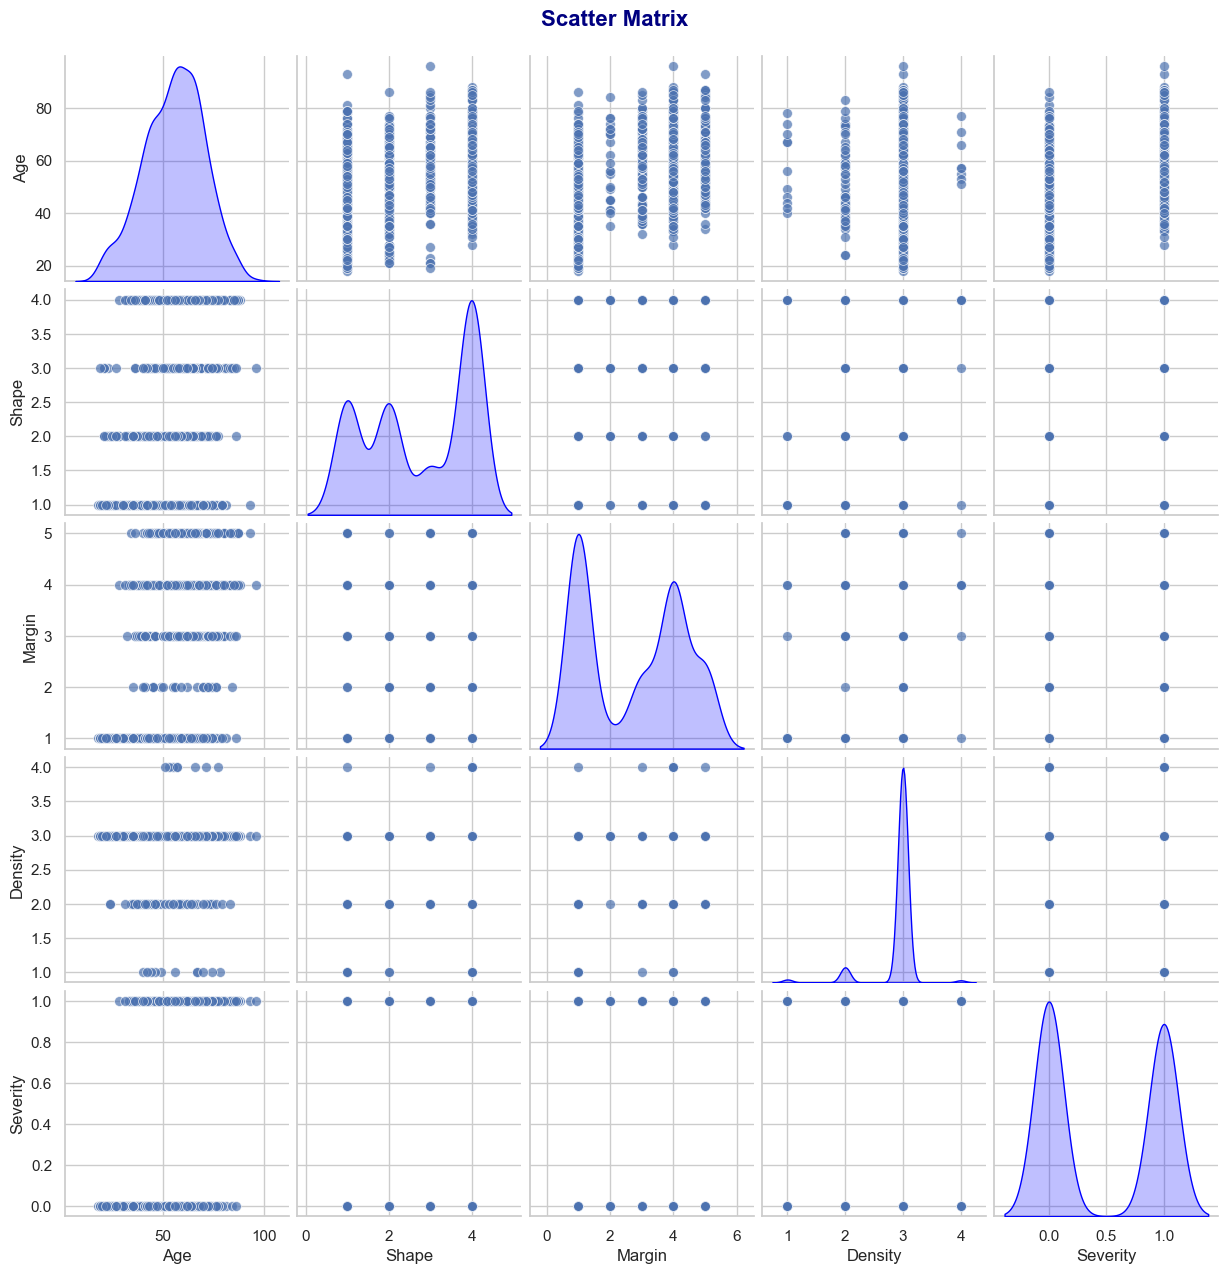

In [390]:
plt.figure(figsize=(6, 8))
pairplot = sns.pairplot(df, diag_kind='kde', palette='Blues', plot_kws={'alpha':0.7, 's':50}, diag_kws={'color':'blue', 'shade':True})

pairplot.fig.suptitle('Scatter Matrix', y=1.02, fontsize=16, fontweight='bold', color='navy')


plt.show()